# Make global data available as pandas data frame

We use data from the files at https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Thank you @CSSEGISandData for providing the data!

In [1]:
%config InlineBackend.figure_formats = ['svg']
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
figsize = (8, 6)   # need bigger size otherwise xlabels are cut-off in svg files

In [2]:
import os
import pandas as pd
import seaborn as sb
sb.set_style('darkgrid')

base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"

def string_to_date(input_):
    """Converts string of type 01/22/02 [for 22 Jan 2020] into datetime object"""
    # return pd.to_datetime(input_, format='%m/%d/%y', errors='ignore')
    return pd.to_datetime(input_, format='%m/%d/%y')


def set_date_formatting(ax):
    ax.xaxis.set_major_locator(matplotlib.dates.DayLocator())
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b %d'))
    ax.tick_params(axis='x', rotation=90)

# read data from web
#
def fetch_data(names = ['Confirmed', 'Deaths', 'Recovered']):
    """Return 4 data frames:
    [confirmed, deaths, recovered], location_info
    
    where confirmed, deaths and recovered are data frames with countries/regions in the rows, and 
    days in the columns
    
    and location_info provides additional information about the locations.
    
    We assume all three tables have the same entries"""
    location_info = pd.DataFrame()
    dfs = []
    for name in names:
        url = os.path.join(base_url, "time_series_19-covid-" + name + ".csv")
        df = pd.read_csv(url, index_col=1)

        location_info['Lat'] = df['Lat']
        location_info['Long'] = df['Long']
        location_info['Province/State'] = df['Province/State']
        location_info['location'] = df.index + "-" + df['Province/State']
        # df = df.drop(labels=["Lat", "Long", "Province/State"], axis=1)
        df = df.drop(labels=["Lat", "Long"], axis=1)
        
        # extract dates from strings
        dates = string_to_date(df.columns[1:])        
        # use those objects as new column labels
        df.columns = [df.columns[0]] + list(dates)
        print(f"{name:10}: last data point from {max(dates[1:])}")
        # dfs.append([df, location_info)
        dfs.append(df)

    return dfs



In [3]:
# (confirmed, deaths, recovered), location_infos = fetch_data()
confirmed, deaths, recovered = fetch_data()

Confirmed : last data point from 2020-03-05 00:00:00
Deaths    : last data point from 2020-03-05 00:00:00
Recovered : last data point from 2020-03-05 00:00:00


In [4]:
deaths.head()

,Province/State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-02-25 00:00:00,2020-02-26 00:00:00,2020-02-27 00:00:00,2020-02-28 00:00:00,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,Anhui,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Mainland China,Beijing,0,0,0,0,0,1,1,1,1,...,4,4,5,7,8,8,8,8,8,8
Mainland China,Chongqing,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Mainland China,Fujian,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Mainland China,Gansu,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [5]:
deaths.describe()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,2020-03-01,2020-03-02,2020-03-03,2020-03-04,2020-03-05
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,0.098266,0.104046,0.150289,0.242775,0.323699,0.473988,0.757225,0.768786,0.988439,1.231214,...,15.653179,16.011561,16.265896,16.601156,17.000000,17.317919,17.832370,18.265896,18.809249,19.352601
std,1.292486,1.294279,1.826950,3.042149,3.954592,5.778435,9.502693,9.502983,12.315611,15.508203,...,194.814479,198.765960,200.742311,203.860752,207.287521,209.882186,213.099553,215.579314,218.394947,220.894659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,17.000000,17.000000,24.000000,40.000000,52.000000,76.000000,125.000000,125.000000,162.000000,204.000000,...,2563.000000,2615.000000,2641.000000,2682.000000,2727.000000,2761.000000,2803.000000,2835.000000,2871.000000,2902.000000


Available countries:

In [6]:
pd.set_option('display.max_rows', 200)
deaths

,Province/State,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,...,2020-02-25 00:00:00,2020-02-26 00:00:00,2020-02-27 00:00:00,2020-02-28 00:00:00,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,
Mainland China,Anhui,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Mainland China,Beijing,0,0,0,0,0,1,1,1,1,...,4,4,5,7,8,8,8,8,8,8
Mainland China,Chongqing,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Mainland China,Fujian,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Mainland China,Gansu,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Mainland China,Guangdong,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
Mainland China,Guangxi,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Mainland China,Guizhou,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Mainland China,Hainan,0,0,0,0,0,1,1,1,1,...,5,5,5,5,5,5,5,5,5,6


# Pick one country

In [7]:
country = "Germany"
#country = "UK"
#country = "Italy"

In [8]:
# create one DataFrame for country/region
c_df = pd.DataFrame()
c_df['confirmed'] = confirmed.loc[country].drop('Province/State')
c_df['recovered'] = recovered.loc[country].drop('Province/State')
c_df['deaths'] = deaths.loc[country].drop('Province/State')
# Compute those who are infected and have not recovered or died yet and call them 'active'
c_df['active'] = c_df['confirmed'] - c_df['recovered'] - c_df['deaths']
c_df.index = string_to_date(c_df.index)

In [9]:
c_df.country = country  # remember which country we work on, just in case
c_df.tail()

,confirmed,recovered,deaths,active
2020-03-01,130,16,0,114
2020-03-02,159,16,0,143
2020-03-03,196,16,0,180
2020-03-04,262,16,0,246
2020-03-05,482,16,0,466


In [10]:
## Only cases since 25 Feb, set all values to zero for that day
c2_df = c_df['2020-02-25':] - c_df.loc['2020-02-25']
c2_df

,confirmed,recovered,deaths,active
2020-02-25,0,0,0,0
2020-02-26,10,1,0,9
2020-02-27,29,2,0,27
2020-02-28,31,2,0,29
2020-02-29,62,2,0,60
2020-03-01,113,2,0,111
2020-03-02,142,2,0,140
2020-03-03,179,2,0,177
2020-03-04,245,2,0,243
2020-03-05,465,2,0,463


/Users/fangohr/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


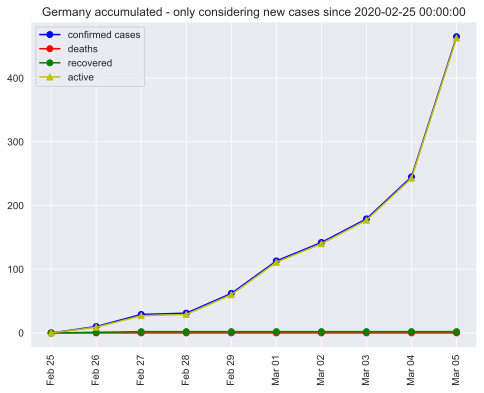

In [11]:
fig, ax = plt.subplots(figsize=figsize)
set_date_formatting(ax)
ax.plot(c2_df.index, c2_df['confirmed'], 'o-b')
ax.plot(c2_df.index, c2_df['deaths'], 'o-r')
ax.plot(c2_df.index, c2_df['recovered'], 'o-g')
ax.plot(c2_df.index, c2_df['active'], '^-y')
ax.legend(['confirmed cases', 'deaths', 'recovered', 'active'])
ax.set_title(country + " accumulated - only considering new cases since " + str(min(c2_df.index)));
fig.savefig("figures/germany-overview-25-feb.svg")

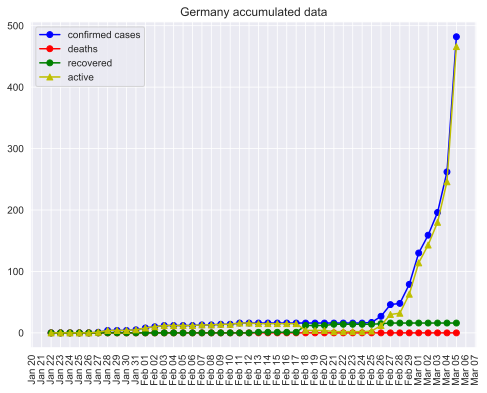

In [12]:
fig, ax = plt.subplots(figsize=figsize)
set_date_formatting(ax)
ax.plot(c_df.index, c_df['confirmed'], 'o-b')
ax.plot(c_df.index, c_df['deaths'], 'o-r')
ax.plot(c_df.index, c_df['recovered'], 'o-g')
ax.plot(c_df.index, c_df['active'], '^-y')
ax.legend(['confirmed cases', 'deaths', 'recovered', 'active'])
ax.set_title(country + " accumulated data")
fig.savefig("figures/germany-overview.svg")

# Compute some derived entities

In [13]:
# Compute day-to-day increases
c_df['new_confirmed'] = c_df['confirmed'].diff()
c_df['new_recovered'] = c_df['recovered'].diff()
c_df['new_deaths'] = c_df['deaths'].diff()
c_df['new_active'] = c_df['active'].diff()

In [14]:
c_df

,confirmed,recovered,deaths,active,new_confirmed,new_recovered,new_deaths,new_active
2020-01-22,0,0,0,0,NaN,NaN,NaN,NaN
2020-01-23,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0
2020-01-27,1,0,0,1,1,0,0,1
2020-01-28,4,0,0,4,3,0,0,3
2020-01-29,4,0,0,4,0,0,0,0
2020-01-30,4,0,0,4,0,0,0,0
2020-01-31,5,0,0,5,1,0,0,1


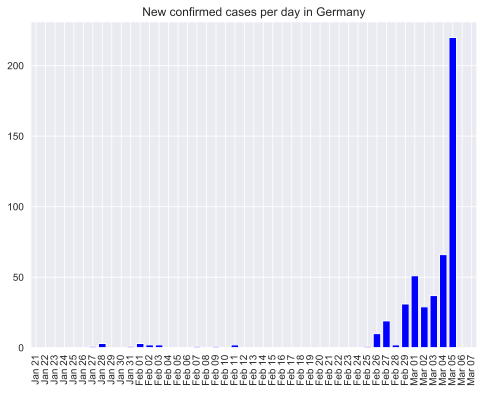

In [15]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_confirmed'], color='b')
set_date_formatting(ax)
ax.set_title(f"New confirmed cases per day in {c_df.country}")
fig.savefig(f'figures/new-cases-{c_df.country}.svg')

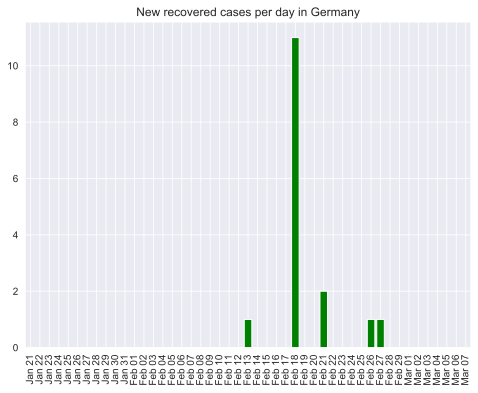

In [16]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_recovered'], color='g')
set_date_formatting(ax)
ax.set_title(f"New recovered cases per day in {c_df.country}")
fig.savefig(f'figures/new-recovered-{c_df.country}.svg')

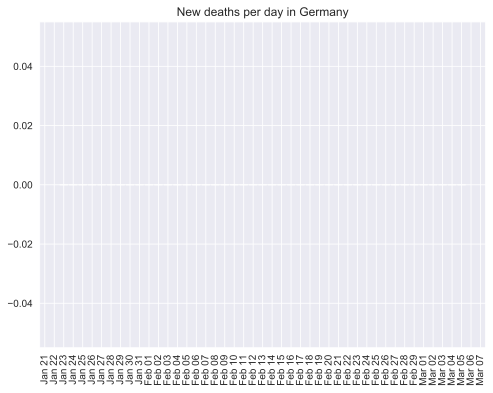

In [17]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_deaths'], color='r')
set_date_formatting(ax)
ax.set_title(f"New deaths per day in {c_df.country}")
fig.savefig(f'figures/new-deaths-{c_df.country}.svg')

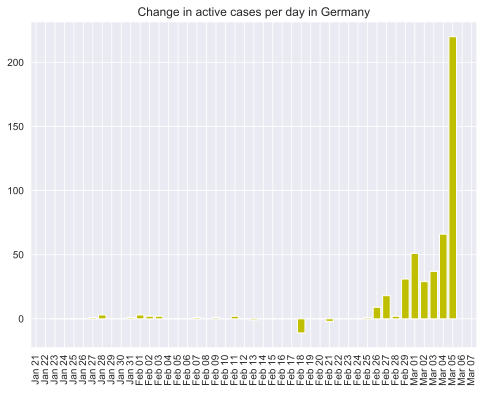

In [18]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(c_df.index, c_df['new_active'], color='y')
set_date_formatting(ax)
ax.set_title(f"Change in active cases per day in {c_df.country}")
fig.savefig(f'figures/new-active-{c_df.country}.svg')

# Look at some world wide data

In [19]:
# global data
glob = pd.DataFrame()
glob['deaths'] = deaths.sum(axis=0)
glob['confirmed'] = confirmed.sum(axis=0)
glob['recovered'] = recovered.sum(axis=0)
glob['active'] = glob['confirmed'] - glob['deaths'] - glob['recovered']
glob.index = string_to_date(glob.index)

In [20]:
pd.set_option('display.max_columns', 200)
glob

,deaths,confirmed,recovered,active
2020-01-22,17,555,28,510
2020-01-23,18,653,30,605
2020-01-24,26,941,36,879
2020-01-25,42,1434,39,1353
2020-01-26,56,2118,52,2010
2020-01-27,82,2927,61,2784
2020-01-28,131,5578,107,5340
2020-01-29,133,6166,126,5907
2020-01-30,171,8234,143,7920
2020-01-31,213,9927,222,9492


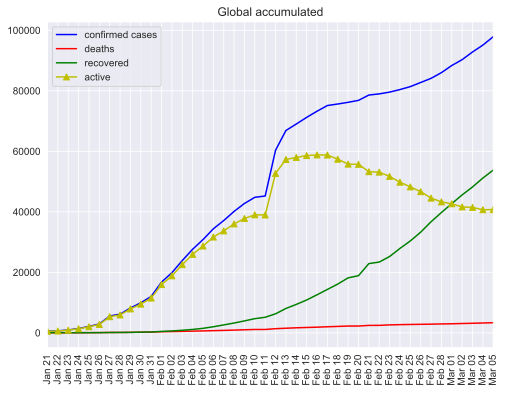

In [21]:
fig, ax = plt.subplots(figsize=figsize)
glob['confirmed'].plot(kind='line', style='-b', ax=ax)
glob['deaths'].plot(kind='line', style='-r', ax=ax)
glob['recovered'].plot(kind='line', style='-g', ax=ax)
glob['active'].plot(kind='line', style='^-y', ax=ax)
set_date_formatting(ax)
ax.legend(['confirmed cases', 'deaths', 'recovered', 'active'])
ax.set_title("Global accumulated");
fig.savefig('figures/global-overview.svg')

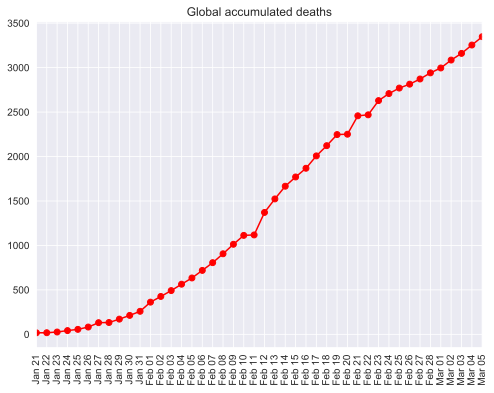

In [22]:
fig, ax = plt.subplots(figsize=figsize)
glob['deaths'].plot(kind='line', style='o-r', ax=ax)
set_date_formatting(ax)
ax.set_title("Global accumulated deaths");
fig.savefig("figures/global-deaths.svg")

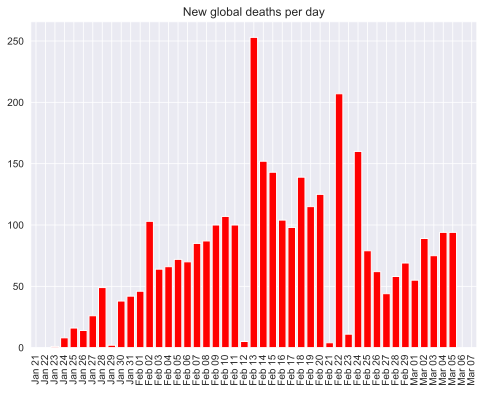

In [23]:
glob['new-deaths'] = glob['deaths'].diff()
glob['new-confirmed'] = glob['confirmed'].diff()

fig, ax = plt.subplots(figsize=figsize)
ax.bar(glob.index, glob['new-deaths'], color='r' )
set_date_formatting(ax)
ax.set_title("New global deaths per day")
fig.savefig('figures/global-new-deaths.svg');

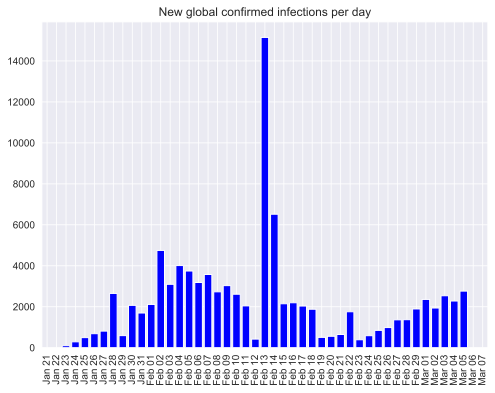

In [24]:
fig, ax = plt.subplots(figsize=figsize)
ax.bar(glob.index, glob['new-confirmed'], color='b')
set_date_formatting(ax)
ax.set_title("New global confirmed infections per day");
fig.savefig('figures/global-new-infections.svg');

# Any common behaviour in growth of infections?

In [25]:
# reduce to only countries with more than ncase cases
ncase = 1000
c3 = confirmed[confirmed.sum(axis=1) > ncase]
c3 = c3.drop('Province/State', axis=1)
print(f"Found {len(c3)} data sets with more than {ncase} infections")

Found 40 data sets with more than 1000 infections


In [26]:

norm = c3.sum(axis=1)

In [31]:
c4 = c3.div(norm, axis='index')
c4 = c3

In [32]:
c4.sum(axis=1)
mainland_china = c4.loc['Mainland China'].sum()
c5 = c4.drop('Mainland China')  # remove the long list of regions in China
# but add summary for China (sum over all regions, then normalised)
c5.loc['Mainland China (sum)'] = mainland_china/mainland_china.sum()
print(f"{len(c5)} data sets remaining after removing regions in China")

12 data sets remaining after removing regions in China


In [33]:
c5

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00,2020-02-02 00:00:00,2020-02-03 00:00:00,2020-02-04 00:00:00,2020-02-05 00:00:00,2020-02-06 00:00:00,2020-02-07 00:00:00,2020-02-08 00:00:00,2020-02-09 00:00:00,2020-02-10 00:00:00,2020-02-11 00:00:00,2020-02-12 00:00:00,2020-02-13 00:00:00,2020-02-14 00:00:00,2020-02-15 00:00:00,2020-02-16 00:00:00,2020-02-17 00:00:00,2020-02-18 00:00:00,2020-02-19 00:00:00,2020-02-20 00:00:00,2020-02-21 00:00:00,2020-02-22 00:00:00,2020-02-23 00:00:00,2020-02-24 00:00:00,2020-02-25 00:00:00,2020-02-26 00:00:00,2020-02-27 00:00:00,2020-02-28 00:00:00,2020-02-29 00:00:00,2020-03-01 00:00:00,2020-03-02 00:00:00,2020-03-03 00:00:00,2020-03-04 00:00:00,2020-03-05 00:00:00
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Thailand,2.000000,3.000000,5.000000,7.000000,8.000000,8.000000,14.000000,14.00000,14.000000,19.000000,19.000000,19.000000,19.000000,25.000000,25.000000,25.000000,25.000000,32.000000,32.000000,32.000000,33.00000,33.00000,33.000000,33.000000,33.000000,34.000000,35.000000,35.000000,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,37.000000,40.000000,40.000000,41.00000,42.000000,42.000000,43.000000,43.000000,43.000000,47.000000
Japan,2.000000,1.000000,2.000000,2.000000,4.000000,4.000000,7.000000,7.00000,11.000000,15.000000,20.000000,20.000000,20.000000,22.000000,22.000000,45.000000,25.000000,25.000000,26.000000,26.000000,26.00000,28.00000,28.000000,29.000000,43.000000,59.000000,66.000000,74.000000,84.000000,94.000000,105.00000,122.000000,147.000000,159.000000,170.000000,189.000000,214.000000,228.00000,241.000000,256.000000,274.000000,293.000000,331.000000,360.000000
South Korea,1.000000,1.000000,2.000000,2.000000,3.000000,4.000000,4.000000,4.00000,4.000000,11.000000,12.000000,15.000000,15.000000,16.000000,19.000000,23.000000,24.000000,24.000000,25.000000,27.000000,28.00000,28.00000,28.000000,28.000000,28.000000,29.000000,30.000000,31.000000,31.000000,104.000000,204.00000,433.000000,602.000000,833.000000,977.000000,1261.000000,1766.000000,2337.00000,3150.000000,3736.000000,4335.000000,5186.000000,5621.000000,6088.000000
Hong Kong,0.000000,2.000000,2.000000,5.000000,8.000000,8.000000,8.000000,10.00000,10.000000,12.000000,13.000000,15.000000,15.000000,17.000000,21.000000,24.000000,25.000000,26.000000,29.000000,38.000000,49.00000,50.00000,53.000000,56.000000,56.000000,57.000000,60.000000,62.000000,63.000000,68.000000,68.00000,69.000000,74.000000,79.000000,84.000000,91.000000,92.000000,94.00000,95.000000,96.000000,100.000000,100.000000,105.000000,105.000000
Singapore,0.000000,1.000000,3.000000,3.000000,4.000000,5.000000,7.000000,7.00000,10.000000,13.000000,16.000000,18.000000,18.000000,24.000000,28.000000,28.000000,30.000000,33.000000,40.000000,45.000000,47.00000,50.00000,58.000000,67.000000,72.000000,75.000000,77.000000,81.000000,84.000000,84.000000,85.00000,85.000000,89.000000,89.000000,91.000000,93.000000,93.000000,93.00000,102.000000,106.000000,108.000000,110.000000,110.000000,117.000000
France,0.000000,0.000000,2.000000,3.000000,3.000000,3.000000,4.000000,5.00000,5.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,11.000000,11.000000,11.000000,11.00000,11.00000,11.000000,11.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000,14.000000,18.000000,38.000000,57.00000,100.000000,130.000000,191.000000,204.000000,285.000000,377.000000
Germany,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,4.00000,4.000000,5.000000,8.000000,10.000000,12.000000,12.000000,12.000000,12.000000,13.000000,13.000000,14.000000,14.000000,16.00000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.000000,17.000000,27.000000,46.000000,48.00000,79.000000,130.000000,159.

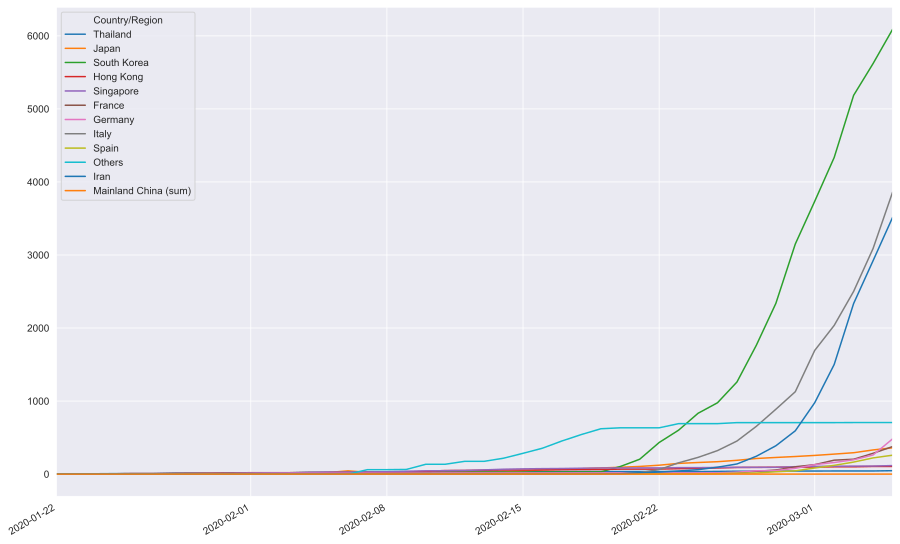

In [34]:
fig, ax = plt.subplots(figsize=(15,10))
c5.T.plot(ax=ax)

Hm, not very conclusive.